<a href="https://colab.research.google.com/github/ASDAFI/Probability-Distributions/blob/master/Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About

Distributions and random variables

Ali Sadafi - First course of probability

under the supervision of Dr. Al mohammad



# Requirements
Here we install needed libraries using pip. then we import it to use.

run cell blow to do this.

In [ ]:
! pip install numpy
! pip install matplotlib
! pip install scipy
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from typing import List
import sympy as sy
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Discrete distributions
here we define some objects to work easier with discrete distributions and random variables.

In [ ]:
class DiscreteDistribution:
    def __init__(self, probability_mass_function):
        self.pmf = probability_mass_function
    def P(self, *args):
        return self.pmf(*args)


## Binomial Distribution

here we implement binomial distribution using the probability mass function.




### Definition
<img src="https://s2.uupload.ir/files/binomial_ljyi.jpg" border="0" alt="" />



### Expectation and variance
also we know this for Expectation of this distribution:

<img src="https://s2.uupload.ir/files/image_2023-02-01_113655843_am60.png" border="0" alt="" />

so, we can calculate Var(X) in this way:

<img src="https://s2.uupload.ir/files/image_2023-02-01_113950685_wqb1.png" border="0" alt="" />

### Implementation
here we represent some implementation using n and p, with needed functions.

In [ ]:
class BinomialDistribution(DiscreteDistribution):
      def __init__(self,  n: int, p: float):
          self.n: int = n
          self.p: float = p
          super().__init__(lambda x: math.comb(n, x) *
                           math.pow(p, x) * math.pow((1 - p), n - x))
      def reload(self,  n: int, p: float):
          self.__init__(n, p)
      
    
      
      def E(self, events: List[int] = None, power: int = 1):
          if events:
              e: float = 0
              for i in range(len(events)):
                  e = e + math.pow(i, power) * events[i]
              experiments_count = sum(events)
              e /= experiments_count
              return e

          elif power == 1:
              return self.n * self.p
          elif power == 2:
              return math.pow(self.n, 2) * math.pow(self.p, 2)  - self.n * math.pow(self.p, 2) + self.n * self.p
          else:
              pass
              # TODO: fix it for any power
     

      def Var(self, events: List[int] = None):
          if events:
              return self.E(events, power = 2) - math.pow(self.E(events), 2)
          else:
              return self.E(power = 2) - math.pow(self.E(), 2)

      def do_experiment(self):
          if random.random() <= self.p:
              return True
          else:
              return False
      
      def do_experiments(self):
          win = 0
          for j in range(self.n):
              win += self.do_experiment()
          return win

      def create_random_space(self, experiments: int = 1000):
          events = [0] * (self.n + 1)
          for i in range(experiments):
              events[self.do_experiments()] += 1
          return events
        
      def F(self, x: int):
          s = 0
          for i in range(0, x + 1):
              s += self.P(i)
          return s



### Test implementation

lets test this distribution on a sample random space:




In [ ]:
# create distribution
n = 20
p = 0.3
bin = BinomialDistribution(n, p)

# create random space
experiments = 10000     # count of experiments
space = bin.create_random_space(experiments)

print(f"Expected value: {bin.E()}\tExpected value in random space: {bin.E(space)}")

Expected value: 6.0	Expected value in random space: 6.0248


Lets checkout expected value and expected value in random space by increasing samples in our random space:



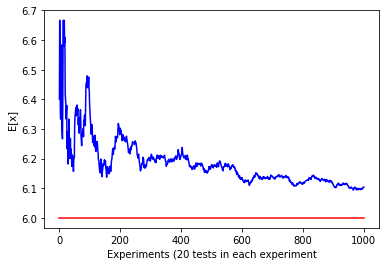

In [ ]:
# create distribution
n = 20
p = 0.3
bin = BinomialDistribution(n, p)

def draw_discrete_E_graph(dist, experiments: int = 1000):
    # create random space
    space = dist.create_random_space(5)           # sample space with 5 experiments

    E = [dist.E(space)]                           # expected value in random spaces
    for _ in range(experiments - 1):
        win = dist.do_experiments()
        space[win] += 1           # update sample space
        E.append(dist.E(space))

    # draw plots
    plt.xlabel(f'Experiments ({n} tests in each experiment)')
    plt.ylabel('E[x]')
    plt.plot(range(1, experiments + 1), E,  color='b', label='random experiments')
    plt.plot(range(1, experiments + 1), experiments * [dist.E()],  color='r', label='E[X] = np')

    plt.show()

draw_discrete_E_graph(bin)
    

### Graphs
here we setup draw graph function to be easier in next sections of notebook.



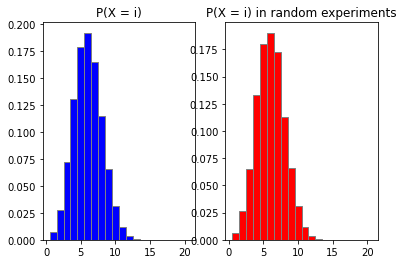

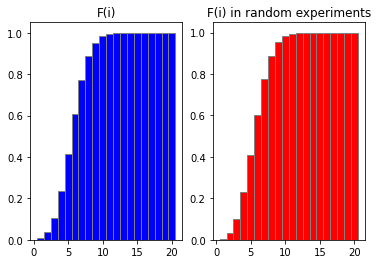

In [ ]:
# create distribution
def draw_p(dist, space = None):
    if not space:
        space = dist.create_random_space(experiments)
    X = range(1, len(space))
    PS = []  # probabilities from random space
    P  = []  # probability from distribution function


    for i in X:
        PS.append(space[i]/experiments)
        P.append(dist.P(i))


    # draw plots
    ## mass function
    fig, (ax1, ax2) =  plt.subplots(1, 2)
    ax1.bar(X, P, color ='b', width = 1,
            edgecolor ='grey')
    ax1.set_title('P(X = i)')


    ax2.bar(X, PS, color ='r', width = 1,
            edgecolor ='grey')
    ax2.set_title('P(X = i) in random experiments')
    return fig, ax1, ax2

def draw_f(dist, space = None):
    if not space:
        space = dist.create_random_space(experiments)
    X = range(1, len(space))

    FS = [0]  # distribution from random space
    F  = [0]  # distribution from distribution function

    for i in X:
        F.append(dist.F(i))
        FS.append(FS[-1] + space[i]/experiments)

    F.pop(0)
    FS.pop(0)


    ## distribution function
    fig2, (ax3, ax4) =  plt.subplots(1, 2)
    ax3.bar(X, F, color ='b', width = 1,
            edgecolor ='grey')
    ax3.set_title('F(i)')


    ax4.bar(X, FS, color ='r', width = 1,
            edgecolor ='grey')
    ax4.set_title('F(i) in random experiments')
  
    return fig2, ax3, ax4


def draw_discrete_graph(dist, experiments: int = 10000, space: List[int] = None):
    
    # create random space if its not available
    if not space:
        space = dist.create_random_space(experiments)
    draw_p(dist, space)
    draw_f(dist, space)
    plt.show()

n = 20
p = 0.3
bin = BinomialDistribution(n, p)
draw_discrete_graph(bin)


## Poisson Distribution

### Definition
we define poisson approximation from binomial distribution using following method:
<img src="https://s2.uupload.ir/files/image_2023-02-01_133825186_xk2u.png" border="0" alt="" />

we know that F(inf) should be 1 and P(X = i) >= 0. if we do not violate this constraints, we can define our distribution. Second constraint does not viloated (It is obvious!) .

so:

<img src="https://s2.uupload.ir/files/image_2023-02-01_134256446_9jql.png" border="0" alt="" />

know we can define our probability mass function and our distribution:

<img src="https://s2.uupload.ir/files/image_2023-02-01_134459384_vn7o.png" border="0" alt="" />

### Expectation and variance
<img src="https://s2.uupload.ir/files/image_2023-02-01_135425727_0qr9.png" border="0" alt="" />

### Implementation
here we represent some implementation using lambda, with needed functions.

In [ ]:
class PoissonDistribution(DiscreteDistribution):
      def __init__(self,  landa: float):
          self.landa: float = landa
          super().__init__(lambda x: math.exp(- self.landa) *
                           math.pow(landa, x) / math.factorial(x))
      def reload(self, landa: float):
          self.__init__(landa)
      
    
      
      def E(self, events: List[int] = None, power: int = 1):
          if events:
              e: float = 0
              for i in range(len(events)):
                  e = e + math.pow(i, power) * events[i]
              experiments_count = sum(events)
              e /= experiments_count
              return e

          elif power == 1:
              return self.landa
          elif power == 2:
              return math.pow(self.landa, 2) + self.landa
          else:
              pass
              # TODO: fix it for any power
     

      def Var(self, events: List[int] = None):
          if events:
              return self.E(events, power = 2) - math.pow(self.E(events), 2)
          else:
              return self.E(power = 2) - math.pow(self.E(), 2)
        
      def F(self, x: int):
          s = 0
          for i in range(0, x + 1):
              s += self.P(i)
          return s


### Test implementation

lets test this distribution on a sample random space.
we set lambda equal to np and use Binomial distribution to build sample random space.

In [ ]:
# create distribution
p = 0.3
n = 20
bin = BinomialDistribution(n, p)
landa = 0.3 * 20 
pos = PoissonDistribution(landa)

# create random space
experiments = 10000     # count of experiments
space = bin.create_random_space(experiments)

print(f"Expected value using Poisson: {pos.E()}\tExpected value in random space: {pos.E(space)} \t")

Expected value using Poisson: 6.0	Expected value in random space: 5.9952 	


### Graphs


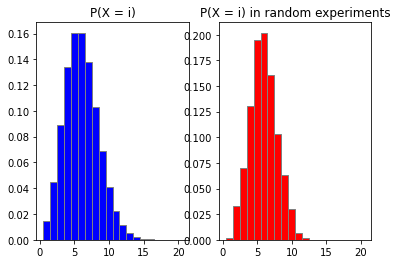

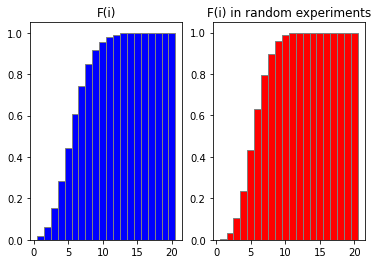

In [ ]:
n = 20
p = 0.3
experiments = 1000
pos = PoissonDistribution(n * p)
bin = BinomialDistribution(n, p)
space = bin.create_random_space(experiments)
draw_discrete_graph(pos, experiments = experiments, space = space)


### Approximation

here we want to checkout our approximation using graph.
its well for our intuition about poisson distribution and the relation between poisson and binomial.

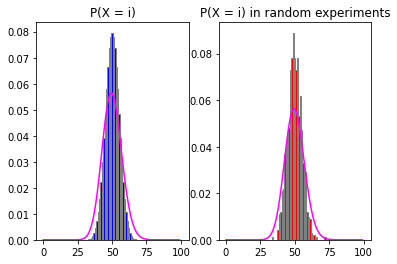

In [ ]:
n = 100
p = 1/2
experiments = 1000
pos = PoissonDistribution(n * p)
bin = BinomialDistribution(n, p)

fig, ax1, ax2 = draw_p(bin)
ax1.plot(range(n), [pos.P(i) for i in range(n)], 'magenta', label='Poisson')
ax2.plot(range(n), [pos.P(i) for i in range(n)], 'magenta', label='Poisson')

plt.show()

## Exponential distribution

### Definition

<img src="https://s2.uupload.ir/files/image_2023-02-05_021300563_d009.png" border="0" alt="" >

### Expectation and variance

<img src="https://s2.uupload.ir/files/image_2023-02-05_021346385_knhu.png" border="0" alt="" >

### Implementation

here we represent some implementation using p, with needed functions.

In [ ]:
class ExponentialDistribution(DiscreteDistribution):
      def __init__(self, p: float):
          self.p: float = p
          super().__init__(lambda x: math.pow((1 - p), x - 1) * p)
      def reload(self, p: float):
          self.__init__(p)
       
      def E(self, events: List[int] = None, power: int = 1):
          if events:
              e: float = 0
              for i in range(len(events)):
                  e = e + math.pow(i, power) * events[i]
              experiments_count = sum(events)
              e /= experiments_count
              return e

          elif power == 1:
              return 1 / self.p
          elif power == 2:
              return (2 - p) / math.pow(p, 2)
          else:
              pass
              # TODO: fix it for any power
     

      def Var(self, events: List[int] = None):
          if events:
              return self.E(events, power = 2) - math.pow(self.E(events), 2)
          else:
              return self.E(power = 2) - math.pow(self.E(), 2)

      def do_experiment(self):
          if random.random() <= self.p:
              return True
          else:
              return False
      
      def do_experiments(self, tries: int):
          win = 1
          for j in range(tries):
              if self.do_experiment():
                break
              win += 1
          return win

      def create_random_space(self, experiments: int = 1000, tries: int = 1000):
          events = [0] * (tries + 1)
          for i in range(experiments):
              events[self.do_experiments(tries)] += 1
          return events
        
      def F(self, x: int):
          s = 0
          for i in range(0, x + 1):
              s += self.P(i)
          return s



### Test implementation

lets test this distribution on a sample random space.

In [ ]:
# create distribution
p = 0.5
exp = ExponentialDistribution(p)

# create random space
experiments = 1000    # count of experiments
tries = 1000            # try per experiment
space = exp.create_random_space(experiments, tries)
print(f"Expected value: {exp.E()}\tExpected value in random space: {exp.E(space)}")

Expected value: 2.0	Expected value in random space: 1.956


### Graphs

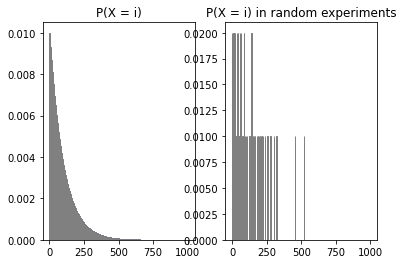

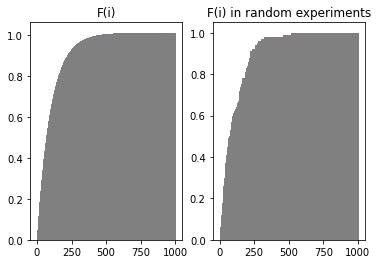

In [ ]:
p = 0.01
experiments = 100
exp = ExponentialDistribution(p)
space = exp.create_random_space(experiments)
draw_discrete_graph(exp, experiments = experiments, space = space)


## Negative binomial distribution

### Definition
<img src="https://s2.uupload.ir/files/image_2023-02-05_021439319_hkpu.png" border="0" alt="" >

### Expectation and variance

Note that a negative binomial probability mass function with parameters (1, p) is geometric.

<img src="https://s2.uupload.ir/files/image_2023-02-05_021511245_rpjd.png" border="0" alt="" >

### Implementation

here we represent some implementation using p and r, with needed functions.

In [ ]:
class NegativeBinomialDistribution(DiscreteDistribution):
      def __init__(self,  r: int, p: float):
          self.r: int = r
          self.p: float = p
          super().__init__(lambda x: math.comb(x - 1, r - 1) *
                           math.pow(p, r) * math.pow((1 - p), x - r))
      def reload(self,  r: int, p: float):
          self.__init__(r, p)
      
    
      
      def E(self, events: List[int] = None, power: int = 1):
          if events:
              e: float = 0
              for i in range(len(events)):
                  e = e + math.pow(i, power) * events[i]
              experiments_count = sum(events)
              e /= experiments_count
              return e

          elif power == 1:
              return self.r / self.p
          elif power == 2:
              return (self.r - self.r * self.p + math.pow(self.r, 2)) / math.pow(self.p, 2) 
          else:
              pass
              # TODO: fix it for any power
     

      def Var(self, events: List[int] = None):
          if events:
              return self.E(events, power = 2) - math.pow(self.E(events), 2)
          else:
              return self.E(power = 2) - math.pow(self.E(), 2)

      def do_experiment(self):
          if random.random() <= self.p:
              return True
          else:
              return False
      
      def do_experiments(self, tries: int):
          win = 0
          last = -1
          for j in range(self.r + tries):
              win += self.do_experiment()
              if win == self.r:
                  last = j
                  break
          return last

      def create_random_space(self, experiments: int = 1000, tries: int = 1000):
          events = [0] * (self.r + tries + 1)
          for i in range(experiments):
              result = self.do_experiments(tries)
              if result != -1: 
                  events[result] += 1
          return events
        
      def F(self, x: int):
          s = 0
          for i in range(self.r, x + 1):
              s += self.P(i)
          return s



### Test implementation

lets test this distribution on a sample random space.

In [ ]:
# create distribution
r = 20
p = 0.3
nbin = NegativeBinomialDistribution(r, p)

# create random space
experiments = 10000     # count of experiments
tries = 1000            # count of tries after r in each experiment
space = nbin.create_random_space(experiments)

print(f"Expected value: {nbin.E()}\tExpected value in random space: {nbin.E(space)}")

Expected value: 66.66666666666667	Expected value in random space: 65.5254


### Graphs

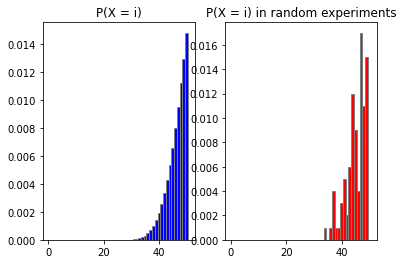

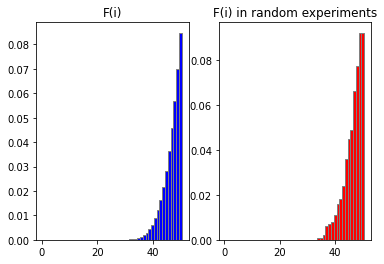

In [ ]:
# create distribution
r = 20
p = 0.3
nbin = NegativeBinomialDistribution(r, p)

# create random space
experiments = 1000     # count of experiments
tries = 30            # count of tries after r in each experiment
space = nbin.create_random_space(experiments, tries)
draw_discrete_graph(nbin, space = space)


## Hypergeometric distribution

### Definition

<img src="https://s2.uupload.ir/files/image_2023-02-04_183543116_bsja.png" border="0" alt="" >

### Expectation and Variance

<img src="https://s2.uupload.ir/files/image_2023-02-04_183824758_c02v.png" border="0" alt="" />

### Implementation

here we represent some implementation using n, D, and N, with needed functions.

In [ ]:
class HypergeometricDistribution(DiscreteDistribution):
      def __init__(self,  n: int, N: int, D: int):
          self.n: int = n
          self.N: int = N
          self.D: int = D
          super().__init__(lambda x: math.comb(D, x) * math.comb(N - D, n - x) / math.comb(N, n))
      def reload(self,  n: int, N: int, D: int):
          self.__init__(n, N, D)
      
    
      
      def E(self, events: List[int] = None, power: int = 1):
          if events:
              e: float = 0
              for i in range(len(events)):
                  e = e + math.pow(i, power) * events[i]
              experiments_count = sum(events)
              e /= experiments_count
              return e

          elif power == 1:
              return self.n * self.D / self.N
          elif power == 2:
              return (self.n * self.D * (self.N - self.D) + math.pow(self.n * self.D), 2) / math.pow(self.N, 2) 
          else:
              pass
              # TODO: fix it for any power
     

      def Var(self, events: List[int] = None):
          if events:
              return self.E(events, power = 2) - math.pow(self.E(events), 2)
          else:
              return self.E(power = 2) - math.pow(self.E(), 2)

      def do_experiment(self):
          if random.random() <= self.D / self.N:
              return True
          else:
              return False
      
      def do_experiments(self):
          win = 0
          for j in range(self.n):
              win += self.do_experiment()
              
          return win

      def create_random_space(self, experiments: int = 1000):
          events = [0] * (self.n + 1)
          for i in range(experiments):
              result = self.do_experiments()
              events[result] += 1
          return events
        
      def F(self, x: int):
          s = 0
          for i in range(x + 1):
              s += self.P(i)
          return s



### Test implementation
lets test this distribution on a sample random 

In [ ]:
# create distribution
N = 30
D = 10
n = 15
hgeo = HypergeometricDistribution(n, N, D)

# create random space
experiments = 10000     # count of experiments
space = nbin.create_random_space(experiments)

print(f"Expected value: {nbin.E()}\tExpected value in random space: {nbin.E(space)}")

Expected value: 66.66666666666667	Expected value in random space: 65.8167


### Graphs

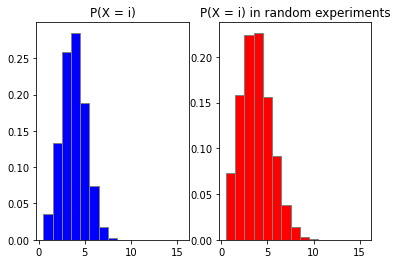

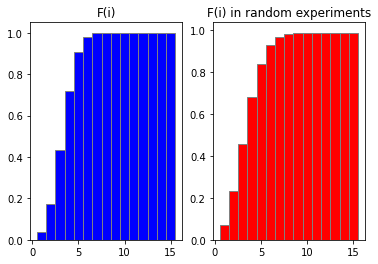

In [ ]:
# create distribution
N = 40
D = 10
n = 15
hgeo = HypergeometricDistribution(n, N, D)

# create random space
experiments = 10000     # count of experiments
space = hgeo.create_random_space(experiments)
draw_discrete_graph(hgeo, space = space)


# Continuous distributions
We define probability density function and probability function P(X = x) in distribution like below:

<img src="https://s2.uupload.ir/files/image_2023-02-04_200916828_vhxe.png" border="0" alt="" />

here we define some objects to work easier with continuous distributions and random variables.

In [ ]:
class ContinuousDistribution:
    def __init__(self, pdf = None, F = None):
        self.pdf = pdf
        self.F = F
    def P(self, a: float, b: float = None):
        if b == None: return 0 
        if self.F:
           return self.F(b) - self.F(a)
        elif self.pdf:
            x = sy.Symbol("x")
            # TODO: fix integrate for Piece wise linear functions (PLF)
            return sy.integrate(self.pdf, (x, a, b))
    def F(self, x: float):
        if self.F:
           return self.F(x)
        elif self.pdf:
            x = sy.Symbol("x")
            inf = 10e9  # TODO: fix infinity
            # TODO: fix integrate for Piece wise linear functions (PLF)
            return sy.integrate(self.pdf, (x, -inf, b))
    
    

## Uniform distribution


### Definition

<img src="https://s2.uupload.ir/files/image_2023-02-04_202420423_mosu.png" border="0" alt="" >

### Expectation and variance

<img src="https://s2.uupload.ir/files/image_2023-02-04_203057820_25o2.png" border="0" alt="" />

### Implementation

here we represent some implementation using a and b, with needed functions.

In [ ]:
class UniformDistribution(ContinuousDistribution):
    def __init__(self, a: float, b: float):
        self.a: float = a
        self.b: float = b
        pdf = lambda x: (x >= self.a and x <= self.b) / (self.b - self.a)
        F = lambda x: (x > self.a) * min(1 / (self.b - self.a) * (x - self.a), 1)
        super().__init__(pdf, F)
    def E(self, events: List[int] = None, power: int = 1):
        if events:
            partitions = len(events)
            e = 0
            for i in range(partitions):
                e += (a + ((2 * i + 1))/2 * (b - a) / partitions) * events[i]
            count_events = sum(events)
            e /= count_events
            print(e)
            return e



        elif power == 1:
            return (self.a + self.b) / 2
        elif power == 2:
            return (math.pow(a, 2) + math.pow(b, 2) + a * b) / 3
        else:
            pass
            # TODO: fix it for any power
  

    def Var(self, events: List[int] = None):
        if events:
            return self.E(events, power = 2) - math.pow(self.E(events), 2)
        else:
            return self.E(power = 2) - math.pow(self.E(), 2)

    def do_experiment(self):
        return random.uniform(a, b)
    
    def create_random_space(self, experiments: int = 1000, partitions: int = 10):
        events = [0] * (partitions)
        p_length = (self.b - self.a) / partitions
        for i in range(experiments):
            result = self.do_experiment()
            for index in range(partitions):
                if result > a + index * p_length and result < a + (index + 1) * p_length:
                    break
            events[index] += 1
        return events
          
        


### Test implementation

lets test this distribution on a sample random space.

we create our random space by dividing continuous domain into partitions. the mean of each partition, is going to represent it.

In [ ]:
# create distribution
a = 0
b = 1000
uni = UniformDistribution(a, b)

# create random space
experiments = 500     # count of experiments
partitions = 20       # partition our continuous domain
space = uni.create_random_space(experiments, partitions)
print(f"Expected value: {uni.E()}\tExpected value in random space: {uni.E(space)}")

489.4
Expected value: 500.0	Expected value in random space: 489.4


### Discrete Distributions

our method to generate random space can be used for discrete domains.

if we plot our graph for a discrete domain we can see this:

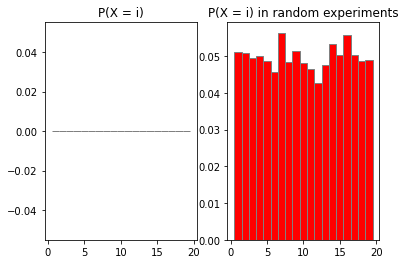

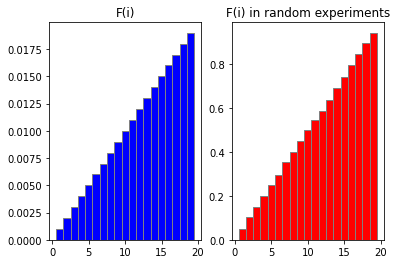

In [ ]:
# create distribution
a = 0
b = 1000
uni = UniformDistribution(a, b)

# create random space
experiments = 5000     # count of experiments
partitions = 20       # partition our continuous domain
space = uni.create_random_space(experiments, partitions)
draw_discrete_graph(uni, space = space)

### Graphs

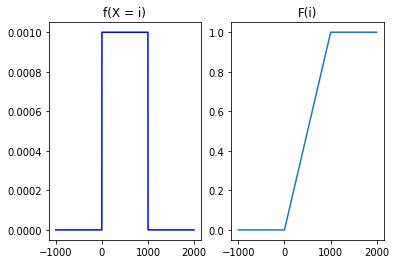

In [ ]:
def draw_continuous_p(dist, ax, start = -1000, stop = 1000, steps = 2000, color = 'b'):
    X = np.linspace(start, stop, steps)
    Y = []
    for i in range(len(X)):
        Y.append(dist.pdf(X[i]))
    ax.plot(X, Y, color = color)

def draw_continuous_F(dist, ax, start = -1000, stop = 1000, steps = 2000):
    X = np.linspace(start, stop, steps)
    Y = []
    for i in range(len(X)):
        Y.append(dist.F(X[i]))
    ax.plot(X, Y)

def draw_continuous_graph(dist, start = -1000, stop = 1000, steps = 2000):
    
    fig, (ax1, ax2) =  plt.subplots(1, 2)
    draw_continuous_p(dist, ax1, start, stop, steps)
    ax1.set_title('f(X = i)')
    draw_continuous_F(dist, ax2, start, stop, steps)
    ax2.set_title('F(i)')

    plt.show()

# create distribution
a = 0
b = 1000
uni = UniformDistribution(a, b)

draw_continuous_graph(uni, start = -1000, stop = 2000, steps = 2000)



## Normal Distribution

### Normal variable



#### Definition
<img src="https://s2.uupload.ir/files/image_2023-02-05_004552458_94k5.png" border="0" alt="" >
<img src="https://s2.uupload.ir/files/image_2023-02-05_004636302_w3dv.png" border="0" alt="" />

#### Expectation and variance

<img src="https://s2.uupload.ir/files/image_2023-02-05_010053319_1mmv.png" border="0" alt="آ" />
<img src="https://s2.uupload.ir/files/image_2023-02-05_010150432_10qk.png" border="0" alt="" />

### Definition
<img src="https://s2.uupload.ir/files/image_2023-02-05_010430201_rn8y.png" border="0" alt="" />

### Expectation and variance
<img src="https://s2.uupload.ir/files/image_2023-02-05_010729487_ova4.png" border="0" alt="" />

### Implementation

here we represent some implementation using mu and sigma, with needed functions.

In [ ]:
class NormalDistribution(ContinuousDistribution):
    def __init__(self, mu: float, sigma: float):
        self.mu: float = mu
        self.sigma: float = sigma
        pdf = lambda x: 1 / (self.sigma * math.sqrt(2 * math.pi)) * math.exp(- math.pow(x - mu, 2) / (2 * math.pow(sigma, 2))) 
        F = lambda x: norm.cdf(x)  # should be fix
        super().__init__(pdf, F)
    def E(self, events: List[int] = None, power: int = 1):
        if events:
            pass



        elif power == 1:
            return self.mu
        elif power == 2:
            return math.pow(self.sigma, 2) + math.pow(self.mu, 2)
        else:
            pass
            # TODO: fix it for any power
  

    def Var(self, events: List[int] = None):
        if events:
            return self.E(events, power = 2) - math.pow(self.E(events), 2)
        else:
            return self.E(power = 2) - math.pow(self.E(), 2)


### Examples




#### Scottish soldier's chest


##### Problem

<img src="https://s2.uupload.ir/files/image_2023-02-05_012000812_u6hh.png" border="0" alt="" />

##### Test Implementation
lets implement previous problem and check result for that.

In [ ]:
# create distribution
mu = 39.8
sigma = 2.05
nor = NormalDistribution(0, 1)  # normal distribution
p =  1 - nor.F((40 - mu) / sigma)
print("P(X >= 40) ~ ", p)

# create binomial distribution
n = 20
bin = BinomialDistribution(n, p)
print("Result is ~ ", bin.P(5))


P(X >= 40) ~  0.46114045678789894
Result is ~  0.030321003196519997


### Graphs
here we compare diffrent mu and sigma together

red: 	 mu: 30  	 sigma: 5
green: 	 mu: 20  	 sigma: 8
blue: 	 mu: 20  	 sigma: 15


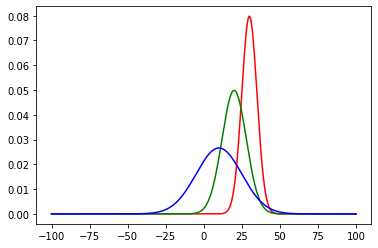

In [ ]:
mu1 = 30
sigma1 = 5
nor1 = NormalDistribution(mu1, sigma1)
mu2 = 20
sigma2 = 8
nor2 = NormalDistribution(mu2, sigma2)

mu3 = 10
sigma3 = 15
nor3 = NormalDistribution(mu3, sigma3)

### output
print(f"red: \t mu: {mu1}  \t sigma: {sigma1}")
print(f"green: \t mu: {mu2}  \t sigma: {sigma2}")
print(f"blue: \t mu: {mu2}  \t sigma: {sigma3}")


### draw plot
start = -100
stop = 100
steps = 3000

draw_continuous_p(nor1, plt, start, stop, steps, 'r')
draw_continuous_p(nor2, plt, start, stop, steps, 'g')
draw_continuous_p(nor3, plt, start, stop, steps, 'b')
plt.show()


### Approximation

we can approximate binomial distribution using normal distribution.



[]

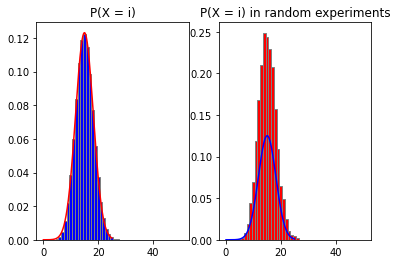

In [ ]:
# Binomial distribution
n = 50
p = 0.3
bin = BinomialDistribution(n, p)
space = bin.create_random_space(10000)

# Normal distribution
mu = bin.E()
sigma = math.sqrt(bin.Var())
nor = NormalDistribution(mu, sigma)

# Normal distribution from random sample
smu = bin.E(space)
ssigma = math.sqrt(bin.Var(space))
snor = NormalDistribution(smu, ssigma)


# plot
_, ax1, ax2 = draw_p(bin, space)
start = 0
stop = 25
steps = 300

draw_continuous_p(nor, ax1, start, stop, steps, 'red')
draw_continuous_p(snor, ax2, start, stop, steps, 'b')

plt.plot()


## Exponential distribution

### Definition

<img src="https://s2.uupload.ir/files/image_2023-02-05_022951027_wa0f.png" border="0" alt="" />

### Expectation and variance

<img src="https://s2.uupload.ir/files/image_2023-02-05_023307544_ixkp.png" border="0" alt="" />


### Implementation

here we represent some implementation using landa, with needed functions.

In [ ]:
class ContinuousExponentialDistribution(ContinuousDistribution):
    def __init__(self, landa: float):
        self.landa: float = landa
        pdf = lambda x: (x > 0) * (landa) * math.exp(-landa * x)
        F = lambda x: (x > 0) * (1 - math.exp(-landa * x))
        super().__init__(pdf, F)
    def E(self, events: List[int] = None, power: int = 1):
        if events:
            pass

        elif power == 1:
            return 1 / self.landa
        elif power == 2:
            return 2 / math.pow(self.landa, 2)
        else:
            pass
            # TODO: fix it for any power
  

    def Var(self, events: List[int] = None):
        if events:
            return self.E(events, power = 2) - math.pow(self.E(events), 2)
        else:
            return self.E(power = 2) - math.pow(self.E(), 2)


### Graphs

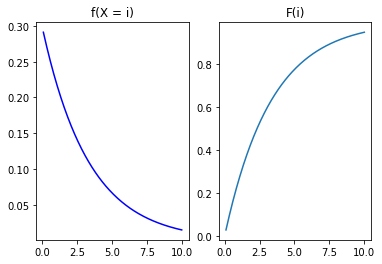

In [ ]:

# create distribution
landa = 0.3
cexp = ContinuousExponentialDistribution(landa)

draw_continuous_graph(cexp, start = 0.1, stop = 10, steps = 200)



## Gamma distribution

### Definition

<img src="https://s2.uupload.ir/files/image_2023-02-05_024932397_p5dg.png" border="0" alt="" />

### Expectation and variance

<img src="https://s2.uupload.ir/files/image_2023-02-05_025048380_3n7l.png" border="0" alt="" />
<img src="https://s2.uupload.ir/files/image_2023-02-05_025131650_e34w.png" border="0" alt="" />

### Implementation
here we represent some implementation using r and landa, with needed functions.

In [ ]:
class GammaDistribution(ContinuousDistribution):
    def __init__(self, r: float, landa: float):
        self.landa: float = landa
        self.r: float = r
        pdf = lambda x: (x >= 0) * self.landa * math.exp(-self.landa * x) * math.pow(self.landa * x, self.r - 1) / math.gamma(self.r)
        super().__init__(pdf)
    def E(self, events: List[int] = None, power: int = 1):
        if events:
            pass

        else:
            return math.gamma(power + self.r) / (math.gamma(self.r) * math.pow(self.landa, power))
  

    def Var(self, events: List[int] = None):
        if events:
            return self.E(events, power = 2) - math.pow(self.E(events), 2)
        else:
            return self.E(power = 2) - math.pow(self.E(), 2)


### Graphs

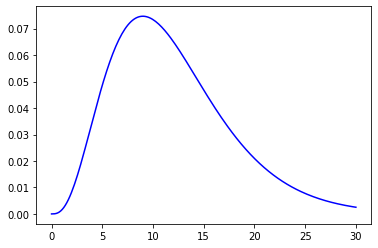

In [ ]:
r = 4
landa = 1/3
gam = GammaDistribution(r, landa)

draw_continuous_p(gam, plt, start = 0, stop = 30, steps = 200, color = 'b')
plt.show()


#### More Examples



##### Constant lambda
in this example landa is 0.25.

red: 	 r: 2  	 landa: 0.3333333333333333
green: 	 r: 3  	 landa: 0.3333333333333333
blue: 	 r: 4  	 landa: 0.3333333333333333


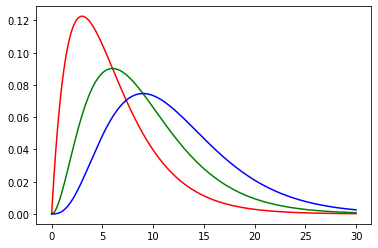

In [ ]:
r1 = 2
gam1 = GammaDistribution(r1, landa)

r2 = 3
gam2 = GammaDistribution(r2, landa)

r3 = 4
gam3 = GammaDistribution(r3, landa)

### output
print(f"red: \t r: {r1}  \t landa: {landa}")
print(f"green: \t r: {r2}  \t landa: {landa}")
print(f"blue: \t r: {r3}  \t landa: {landa}")


### draw plot
start = 0
stop = 30
steps = 300

draw_continuous_p(gam1, plt, start, stop, steps, 'r')
draw_continuous_p(gam2, plt, start, stop, steps, 'g')
draw_continuous_p(gam3, plt, start, stop, steps, 'b')
plt.show()


##### Constant r
in this example r is 4.

red: 	 r: 4  	 landa: 0.6
green: 	 r: 4  	 landa: 0.5
blue: 	 r: 4  	 landa: 0.2


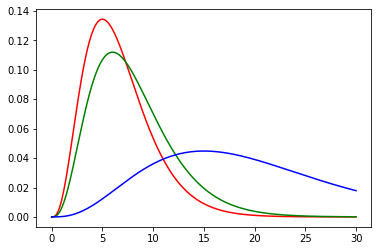

In [ ]:
r = 4
landa1 = 0.6
gam1 = GammaDistribution(r, landa1)

landa2 = 0.5
gam2 = GammaDistribution(r, landa2)

landa3 = 0.2
gam3 = GammaDistribution(r, landa3)

### output
print(f"red: \t r: {r}  \t landa: {landa1}")
print(f"green: \t r: {r}  \t landa: {landa2}")
print(f"blue: \t r: {r}  \t landa: {landa3}")


### draw plot
start = 0
stop = 30
steps = 300

draw_continuous_p(gam1, plt, start, stop, steps, 'r')
draw_continuous_p(gam2, plt, start, stop, steps, 'g')
draw_continuous_p(gam3, plt, start, stop, steps, 'b')
plt.show()


# Contribution

fix and complete #TODO tags, and debug it if you find some bugs in it.

refactor some part of them which is complicated (this notebook should be as clear as posslible).

Thanks for your contribution!